In [1]:
import tensorflow as tf
import numpy as np

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data*0.1+0.3

In [2]:
Weights = tf.Variable(tf.random_uniform([1],-1.0,1.0))
biases = tf.Variable(tf.zeros([1]))

y = Weights*x_data + biases

In [3]:
loss = tf.reduce_mean(tf.square(y-y_data))

In [5]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [6]:
init = tf.global_variables_initializer()

In [7]:
sess = tf.Session()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step,sess.run(Weights),sess.run(biases))

0 [-0.36377305] [0.7255977]
20 [-0.0311835] [0.367531]
40 [0.06812018] [0.3164112]
60 [0.09225266] [0.30398822]
80 [0.09811728] [0.3009692]
100 [0.09954248] [0.30023554]
120 [0.09988882] [0.30005723]
140 [0.09997299] [0.3000139]
160 [0.09999344] [0.30000338]
180 [0.09999839] [0.30000085]
200 [0.09999961] [0.30000022]


# session

In [8]:
matrix1 = tf.constant([[3,3]])
matrix2 = tf.constant([[2],
                      [2]])
product = tf.matmul(matrix1,matrix2)

In [11]:
#method 1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()

[[12]]


In [13]:
#method2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


# Variable

In [14]:
state = tf.Variable(0,name='counter')

#定义常量one
one = tf.constant(1)

#定义加法步骤（刺不并没有直接计算）
new_value = tf.add(state,one)

#将State 更新成new_value
update = tf.assign(state,new_value)

In [17]:
# 如果定义 Variable, 就一定要 initialize
init = tf.global_variables_initializer()

#使用Session
with tf.Session() as sess:
    sess.run(init)
    for _ in range(3):
        sess.run(update)
        print(sess.run(state))

1
2
3


# placeholder 

In [21]:
#在 Tensorflow 中需要定义 placeholder 的 type ，一般为 float32 形式
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1,input2)

In [22]:
with tf.Session() as sess:
    print(sess.run(output,feed_dict={input1:[7.],input2:[2.0]}))
    

[14.]


# (Activation Function)添加层

In [2]:
def add_layer(input,in_size,out_size,activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])+ 0.1)
    Wx_plus_b = tf.matmul(input, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [ ]:
#可视化
def add_layer(input,in_size,out_size,activation_function=None):
    with tf.name_scope("layer"):
        with tf.name_scope('weights'):
            Weights = tf.Variable(tf.random_normal([in_size, out_size]))
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.matmul(input, Weights) + biases
        with tf.name_scope('biases'):
            biases = tf.Variable(tf.zeros([1,out_size])+ 0.1)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        return outputs
        

In [3]:
import numpy as np
import tensorflow as tf

In [49]:
x_data = np.linspace(-1,1,300,dtype=np.float32)[:,np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

In [50]:
with tf.name_scope("inputs"):
    xs = tf.placeholder(tf.float32,[None, 1],name='x_in')
    ys = tf.placeholder(tf.float32,[None,1],name='y_in')

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

In [51]:
l1 = add_layer(xs,1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1,10,1,activation_function=None)

In [56]:
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction),
                                   reduction_indices=[1]))
with tf.name_scope('train'):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [57]:
sess = tf.Session()
writer = tf.summary.FileWriter("logs/",sess.graph)
init = tf.global_variables_initializer()
sess.run(init)


In [61]:
tensorboard --logdir logs

SyntaxError: invalid syntax (<ipython-input-61-575f178ee557>, line 1)

训练

In [46]:
import matplotlib.pyplot as plt

%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data,y_data)
plt.ion()#plt.ion()#本次运行请注释，全局运行不要注释

In [48]:
for i in range(1000):
    sess.run(train_step,feed_dict={xs:x_data,ys:y_data})
    if i%50 == 0:
        try:
            ax.lines.remove( [lines[0]])
        except Exception:
            pass
        prediction_value = sess.run(prediction,feed_dict={xs:x_data,ys:y_data})
        lines = ax.plot(x_data,prediction_value,'r-',lw=5)
        plt.pause(1)

In [2]:
import json
import easygui as g
import sys
import pandas as pd
from pandas.io.parsers import read_csv
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import groupby


class Draw:
    def __init__(self,x,y1,y2=[]):
        self.x=x
        self.y1=y1
        self.y2=y2
    
    def plot_scatter(self,title,xlabel,ylabel,name):
        plt.scatter(self.x,self.y1,s=100,c="red",)
        plt.scatter(self.x,self.y2,s=100,c="blue")
        plt.title(title,fontsize = 24)
        plt.xlabel(xlabel,fontsize = 14)
        plt.ylabel(ylabel,fontsize = 14)
        plt.savefig(name,bbox_inches = "tight")
        plt.show()
        
    def plot_plot(self,title,xlabel,ylabel,name):
        fig = plt.figure(figsize=(10,6))
        fig.autofmt_xdate()  #可以设置横坐标的日期倾斜，不至于重叠
        plt.plot(self.x,self.y1,linewidth=3,c="red",alpha = 0.5)  #alpha是颜色的透明度，0代表完全透明，1代表不透明
        plt.plot(self.x,self.y2,linewidth=3,c="blue",alpha = 0.5)
        plt.title(title,fontsize = 24)
        plt.xlabel(xlabel,fontsize = 14)
        plt.ylabel(ylabel,fontsize = 14)
        plt.fill_between(dates,highs,lows,facecolor = "blue",alpha = 0.1)  #设置两条折线之间的颜色填充
        plt.savefig(name,bbox_inches = "tight")
        plt.show()

[0]
CSV文件转换为DataFrame：
         date  month  max_tem  min_tem
0    2018-4-5      4        2       -2
1   2018-4-10      4        4       -2
2   2018-4-15      4        5       -1
3   2018-4-20      4        5        0
4   2018-4-25      4        7       -1
5   2018-4-30      4        9        2
6    2018-5-5      5       12        5
7   2018-5-10      5       14        6
8   2018-5-15      5       17        6
9   2018-5-20      5       16        8
10  2018-5-25      5       19       10
11  2018-5-30      5       22       10
12   2018-6-5      6       24       12
13  2018-6-10      6       26       15
14  2018-6-15      6       25       18
15  2018-6-20      6       29       20
16  2018-6-25      6       28       24
17  2018-6-30      6       30       27


dates
[datetime.datetime(2018, 4, 5, 0, 0), datetime.datetime(2018, 4, 10, 0, 0), datetime.datetime(2018, 4, 15, 0, 0), datetime.datetime(2018, 4, 20, 0, 0), datetime.datetime(2018, 4, 25, 0, 0), datetime.datetime(2018, 4, 30, 0, 0), 

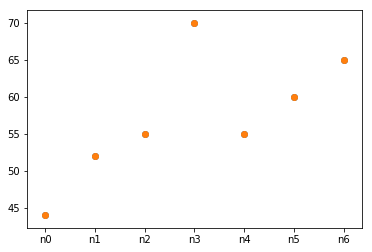

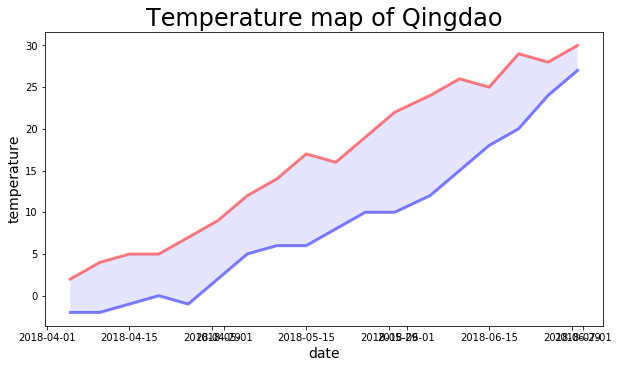

4
        date  month  max_tem  min_tem
0   2018-4-5      4        2       -2
1  2018-4-10      4        4       -2
2  2018-4-15      4        5       -1
3  2018-4-20      4        5        0
4  2018-4-25      4        7       -1
5  2018-4-30      4        9        2
计算当前组（月）最高温的平均值和最低温的平均值
5.33333333333
-0.666666666667



5
         date  month  max_tem  min_tem
6    2018-5-5      5       12        5
7   2018-5-10      5       14        6
8   2018-5-15      5       17        6
9   2018-5-20      5       16        8
10  2018-5-25      5       19       10
11  2018-5-30      5       22       10
计算当前组（月）最高温的平均值和最低温的平均值
16.6666666667
7.5



6
         date  month  max_tem  min_tem
12   2018-6-5      6       24       12
13  2018-6-10      6       26       15
14  2018-6-15      6       25       18
15  2018-6-20      6       29       20
16  2018-6-25      6       28       24
17  2018-6-30      6       30       27
计算当前组（月）最高温的平均值和最低温的平均值
27.0
19.3333333333





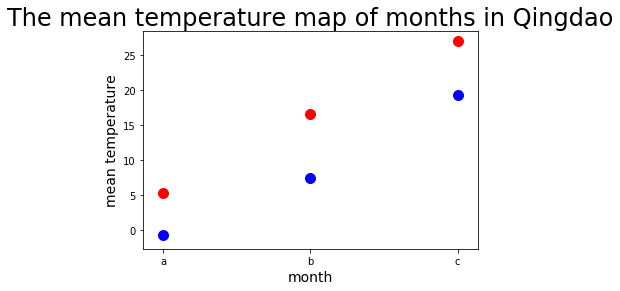

用分组的结果outcome调用agg函数对每组数据施加函数，计算每组（月）数据的平均值和中位数
         max_tem           min_tem       
            mean median       mean median
month                                    
4       5.333333    5.0  -0.666667     -1
5      16.666667   16.5   7.500000      7
6      27.000000   27.0  19.333333     19




数据透视表
          sum               mean               amax            amin        
      max_tem min_tem    max_tem    min_tem max_tem min_tem max_tem min_tem
month                                                                      
4          32      -4   5.333333  -0.666667       9       2       2      -2
5         100      45  16.666667   7.500000      22      10      12       5
6         162     116  27.000000  19.333333      30      27      24      12




In [5]:
#对ages和temperature文件进行操作并显示结果
tf = True  #设置标记
while tf:  #多次选择文件
    #选择文件
    g.msgbox(msg="欢迎进入第一个界面！",title="文件分析",ok_button="开始") #msgbox() 显示一个消息和提供一个"OK"按钮，你可以指定任意的消息和标题
    msg = "请问你想分析哪个文件？"
    title = "文件分析"
    choices = ["ages.json","temperature.csv"]
    # choicebox() 为用户提供了一个可选择的列表，使用序列（元祖或列表）作为选项，这些选项显示前会按照不区分大小写的方法排好序。
    filename = str(g.choicebox(msg,title,choices))    
    
    #分析json文件，计算标准体重
    if filename.endswith("json"):   
        names=[]
        sexes=[]
        ages = []
        heights = []
        weights = []
        weight_nors = []
        results=[]
        #获取数据
        with open(filename)as f:
            data = json.load(f)
            print("data"),print(data),print("\n")
            
            #遍历获取数据
            for dict_age in data:
                try:  #检验是否存在空值，如果有空值，则停止本次循环，遍历下一个元素
                    name = dict_age["name"]           
                    sex = dict_age["sex"]
                    age = dict_age["age"]
                    height = float(dict_age["height"])
                    weight = float(dict_age["weight"])
                except:
                    continue
                else:
                    #计算标准体重，并与文件中的体重进行比较
                    if sex == "b":
                        weight_nor = (height-80)*0.7
                    else:
                        weight_nor = (height-70)*0.6
                        
                    if weight > weight_nor*(1+0.1): 
                        result = "体重过重"
                    elif weight < weight_nor*(1-0.1):
                        result = "体重过轻"
                    else:
                        result = "正常体重"
                        
                        
                    names.append(name)
                    sexes.append(sex)
                    ages.append(age)
                    heights.append(height)
                    weights.append(weight)
                    weight_nors.append(weight_nor)
                    results.append(result)
                    
            #构建DataFrame显示结果       
            df = pd.DataFrame()
            df["sex"] = sexes
            df["age"] = ages
            df["height"] = heights
            df["weight"] = weights
            df["weight_nors"] = weight_nors
            df["result"]=results
            print(df)
            
            #画图          显示每个人的体重和标准体重                  
            #draw=Draw(names,weights,weight_nors)
            #draw.plot_scatter("Compare","name","","h_w_table.png")
            plt.scatter(names,weights)
            
    #分析csv文件        
    else:
        #获取数据
        df = read_csv(filename)
        print("CSV文件转换为DataFrame：")
        print(df),print("\n")
        dates = []
        months = []
        highs = []
        lows = []
        high_list = []
        low_list = []
        names=[]
        
        #获取DataFrame中的每列数据
        datess = df[df.columns[0]].values   #获取第0列的列名，并以列名为索引获取第一列的日期数据
        for date_time in datess:
            date_time = datetime.strptime(date_time,"%Y-%m-%d")#用datatime的strptime方法为时间字符串设置格式
            dates.append(date_time)
        months = df[df.columns[1]].values
        highs = df[df.columns[2]].values
        lows = df[df.columns[3]].values
        
        print("dates"),print(dates),print("\n")
        print("months"),print(months),print("\n")
        print("highs"),print(highs),print("\n")
        print("lows"),print(lows),print("\n")
        print("单独获取四月和六月的数据"),print(pd.concat([df[:6],df[-6:]]))#concat连接DataFrame
        
        
        
        #画图  显示各个日期的最高温与最低温
        draw=Draw(dates,highs,lows)
        draw.plot_plot("Temperature map of Qingdao","date","temperature","tem_table.png")
        
        
        #获取每月的平均值
        outcome = df.groupby("month")    #以month列对DataFrame进行分组，month列值相同的分为一组。返回的outcome为组名name和组中的数据group
        for name,group in outcome:      #name,group分别为每组的组名（月份）和其中的数据
            try:
                high =group["max_tem"].values#取当前组（月）中数据max_tem列的值，返回此列数据的列表
                low = group["min_tem"].values
            except:
                pass
            else:
                high1 = (high.sum())/len(high)#求当前组（月）最高温度的平均值
                low1 = (low.sum())/len(low)#求当前组（月）最低温度的平均值
                high_list.append(high1)#将当前组（月）的最高温度平均值放入列表
                low_list.append(low1)
                names.append(name)
                print(name),print(group)
                print("计算当前组（月）最高温的平均值和最低温的平均值")
                print(high1)
                print(low1)
                print("\n\n")
        
        #画平均值   显示每月的最高温和最低温的平均值，因为是以月份分组，所以一组就是一个月份
        draw=Draw(['a','b','c'],high_list,low_list)
        draw.plot_scatter("The mean temperature map of months in Qingdao","month","mean temperature","mean_tem.png")
        
        
        print("用分组的结果outcome调用agg函数对每组数据施加函数，计算每组（月）数据的平均值和中位数"),print(outcome.agg([np.mean,np.median])),print("\n")
        
        #构建数据透视表
        print("\n")
        table = pd.pivot_table(df,index=["month"],values=["max_tem","min_tem"],aggfunc=[np.sum,np.mean,np.max,np.min])
        print("数据透视表"),print(table),print("\n")
        
    msg="你想重新进行文件分析吗？"
    title="请选择"
    if g.ccbox(msg,title):   #ccbox() 提供一个选择：Continue 或者 Cancel，并相应的返回 1（选中Continue）或者 0（选中Cancel）。
        continue
    else:
        tf=False
    